<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/LinearSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [ ]:
def linearSearch(L, key):
  i=0
  while i < len(L):
    if L[i]==key:
      return True
    i+=1  
  return False

def linearSearchSentinela(L,key):
  L.append(key)
  i = 0
  while key != L[i]:
    i+=1
  L.pop()
  return i < len(L)

Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random
DOMAIN = 1000000000 #1B
def avgTime(L,func,rounds):
  random.seed(17)
  s = 0
  for i in range(rounds):
    start = time.time()
    key = random.randint(DOMAIN)
    func(L,key)
    end = time.time()
    s += end-start
  return s/rounds

#defines the algorithms to be processed
algorithms = [linearSearch, linearSearchSentinela]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 2 

##sizes 1M, 5M, 10M, 15M, 20M
sizes = [1000000, 5000000,10000000,15000000,20000000]
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}")
  
  #create a list with random numbers
  L=list(random.randint(DOMAIN, size=sizes[i]))
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(L, algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1
Starting round 2
Starting round 3
Starting round 4
Starting round 5
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
linearSearch##1000000,0.499118,linearSearch,1000000
linearSearchSentinela##1000000,0.367674,linearSearchSentinela,1000000
linearSearch##5000000,2.426418,linearSearch,5000000
linearSearchSentinela##5000000,1.805721,linearSearchSentinela,5000000
linearSearch##10000000,4.677158,linearSearch,10000000
linearSearchSentinela##10000000,3.637068,linearSearchSentinela,10000000
linearSearch##15000000,7.248249,linearSearch,15000000
linearSearchSentinela##15000000,5.405179,linearSearchSentinela,15000000
linearSearch##20000000,9.632527,linearSearch,20000000
linearSearchSentinela##20000000,7.208264,linearSearchSentinela,20000000


Resultado do experimento (gráfico)

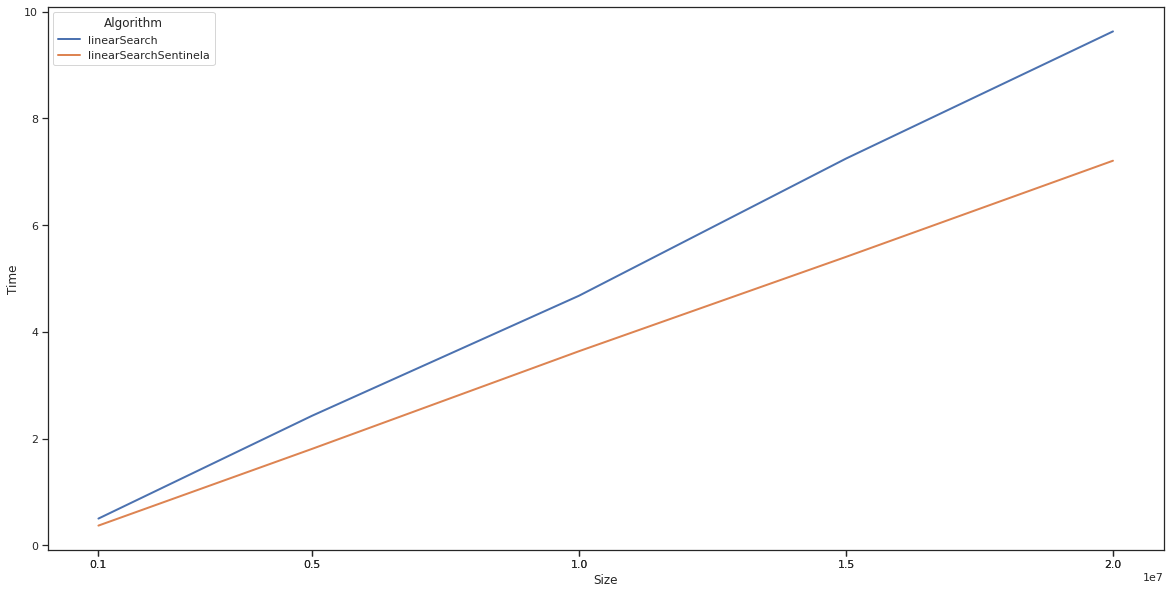

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
fig = plt.figure()
g.set(xticks=[i for i in df.Size])
plt.show()